# Ford Go Bike Trip Analysis
## Chris Manning

## Preliminary Wrangling

> This project is an exploratory analysis of Ford GoBike trip data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load dataset (ford go bike)
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print("this dataset has", df.shape[0], "columns, and", df.shape[1], "rows")

this dataset has 183412 columns, and 16 rows


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# change datatype for "start_time" & "end_time" columns to datetime64
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
# change datatype for "bike_share_for_all_trip" column to boolean values
df.bike_share_for_all_trip = df.bike_share_for_all_trip == 'Yes'

In [8]:
# check column changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

The dataset contains 183,412 trip records.  Each trip record has 16 columns to provided detailed information from each trip
* trip duration
* start/end time
* starting station id, name, lattitude & longitude
* ending station id, name, lattitude & longitude
* bike id
* user type
* member birth year, gender
* bike share for all

### What is/are the main feature(s) of interest in your dataset?

> i'm most interested in understanding how factors such as age, gender, usertype affect trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

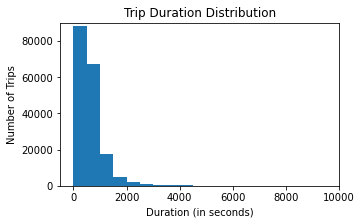

In [9]:
# plot the distribution of trip duration
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[5, 3])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (in seconds)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

distribution is very heavily skewed.  will need to decrease bin size to get a deeper understanding of the data

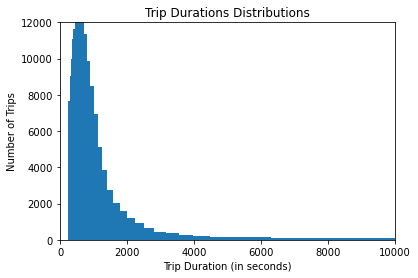

In [120]:
# re-plot the distribution of trip duration with smaller bin size
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[6,4])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Trip Durations Distributions')
plt.xlabel('Trip Duration (in seconds)')
plt.ylabel('Number of Trips')
plt.axis([0, 10000, 0, 12000])
plt.show()

decreasing the bin sizes pretty much shows the same distribution.  Its heavily skewed to the right with the vast majority of trip durations are under 2000 seconds with the greatest majority between 200 - 1000 seconds.

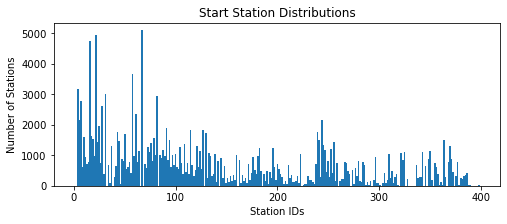

In [64]:
# Plotting start station ids
binsize = 1.5
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 3])
plt.xticks(range(0, 1000, 100))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Start Station Distributions')
plt.xlabel('Station IDs')
plt.ylabel('Number of Stations')

plt.show()

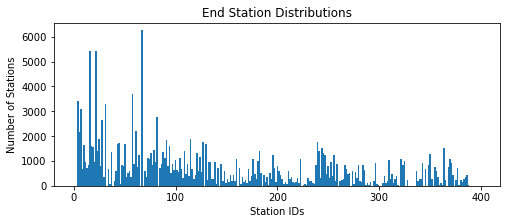

In [65]:
# Plotting start station ids
binsize = 1.5
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 3])
plt.xticks(range(0, 1000, 100))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('End Station Distributions')
plt.xlabel('Station IDs')
plt.ylabel('Number of Stations')

plt.show()

The distribution in these charts are extremely similar.  This indicates that the start and end station ids for each trip are most likely the same.

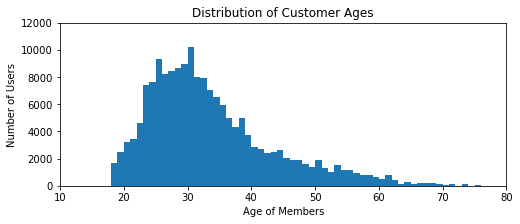

In [69]:
# Plotting age distribution of users
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 3])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of Customer Ages')
plt.xlabel('Age of Members')
plt.ylabel('Number of Users')
plt.show()

The distribution shows that the majority of members are between 20 and 40 years old

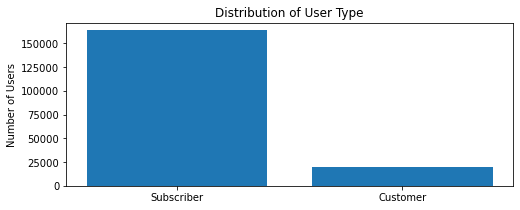

In [71]:
# plotting types of users 
plt.figure(figsize=[8,3])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.title('Distribution of User Type')
plt.ylabel('Number of Users')
plt.show()

The overwhelming majority of users are subscribers

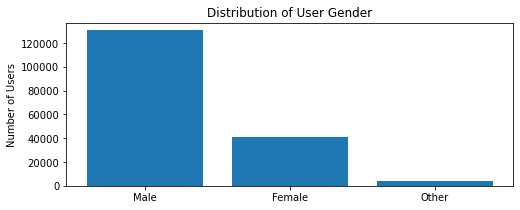

In [72]:
# plotting gender by user
plt.figure(figsize=[8,3])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.title('Distribution of User Gender')
plt.ylabel('Number of Users')
plt.show()

The overwhelming majority of users are male

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not notice any unusual points, however there were some strong majorities in the data (ex. user type & gender) and some centralized distributions
    > user ages - mostly between 20-40 years old
    > trip durations - mostly between 200-1000

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Readjusted bin size when looking at the distribution of trip durations due to the shear volume of records
> in order to chart age, needed to perform calculations to convert birth year to age.

## Bivariate Exploration

* Will be plotting trip duration vs different variables
    * age
    * start station
    * end station
    * user type
    * gender

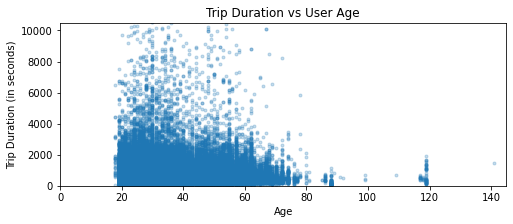

In [121]:
# scatterplot trip duration vs age
plt.figure(figsize=[8,3])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([0, 145, 0, 10500])
plt.title('Trip Duration vs User Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (in seconds)')
plt.show()

This chart has multiple findings
* trip duration declines as the user age increases
* majority of trip durations are under 6000 seconds - will replot with values over 6000 removed
* we mostly likely have some data issues as its highly unlikely that there are people over 100 years old (of which we have several in the data) are renting bicycles - will replot with values over 80 removed

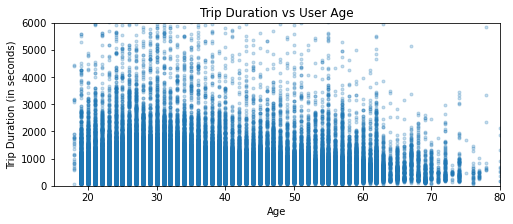

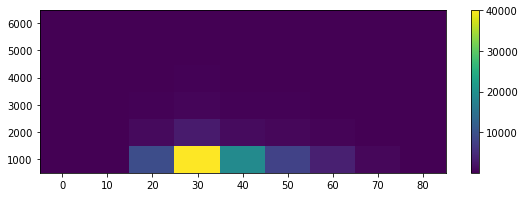

In [122]:
# 2nd attempt - scatterplot trip duration vs age
    #age capped at 80
    #duration capped at 6000
    
plt.figure(figsize=[8,3])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([15, 80, 0, 6000])
plt.title('Trip Duration vs User Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (in seconds)')
plt.show()

# create heatmap to understand most popular ages
plt.figure(figsize=[20,3])
plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

the trip duration scatterplot definitely the initial hypothesis that duration declines with age.
the subplot also confirms an earlier finding that the majority of users are between 20-40 years old

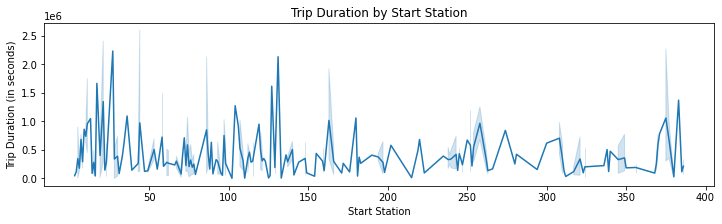

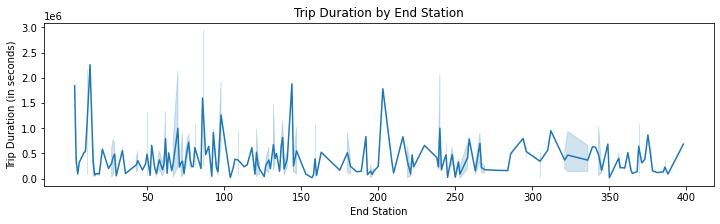

In [123]:
# Plot trip duration by start station

S = []

all_start_station_ids = sorted(df.start_station_id.unique())
for x in all_start_station_ids :
    S.append(df[df.start_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(S)

plt.figure(figsize = [12,3])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.title('Trip Duration by Start Station')
plt.xlabel('Start Station')
plt.ylabel('Trip Duration (in seconds)')
plt.xticks([50, 100, 150, 200, 250, 300, 350, 400], [50, 100, 150, 200, 250, 300, 350, 400])
plt.show()

# Plot trip duration by end station
S = []

all_end_station_ids = sorted(df.end_station_id.unique())
for x in all_end_station_ids :
    S.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(S)

plt.figure(figsize = [12,3])
sb.lineplot(x = df['end_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.title('Trip Duration by End Station')
plt.xlabel('End Station')
plt.ylabel('Trip Duration (in seconds)')
plt.xticks([50, 100, 150, 200, 250, 300, 350, 400], [50, 100, 150, 200, 250, 300, 350, 400])
plt.show()

Trip duration does differ between the different start stations.  
Also in using this view the start and end station durations while still looking similar dont look as similar as they did earlier

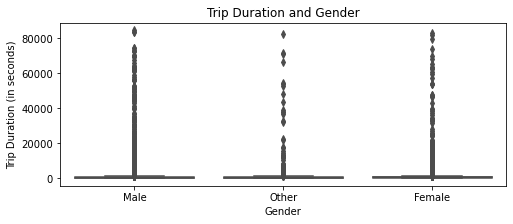

In [124]:
# plot to show trip duration by gender

plt.figure(figsize = [8,3])
base_color = sb.color_palette()[3]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (in seconds)')
plt.show()

This chart does not really help to understand the true distributions.  will trim off the higher values and use a different chart

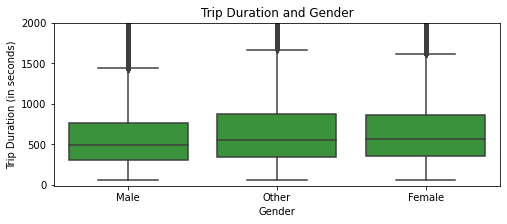

In [125]:
# 2nd attempt boxplot to show trip duration by gender

plt.figure(figsize = [8, 3])
base_color = sb.color_palette()[2]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (in seconds)')
plt.show()

While the number of male riders, which we know from earlier is the majority, they take the shortest trips

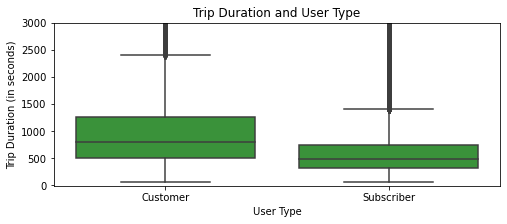

In [126]:
# plot trip duration by usertype

plt.figure(figsize = [8, 3])
base_color = sb.color_palette()[2]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (in seconds)')
plt.show()

The subscriber base is about 5 times larger than the customer base
Howerver the customer base takes much longer trips than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* trip duration increases with age
* male riders have the lowest trip durations
* customers take longer trips than subscribers
* start/end station have differing trip durations but no clear trends

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Did find it interesting that two of the features have similar data trends
    * there are many more subscribers than customers, but customers take longer trips
    * there are many more males than female & other genders, but males take the shortest trips

## Multivariate Exploration

Looking to explore user type, gender, trip duration and age

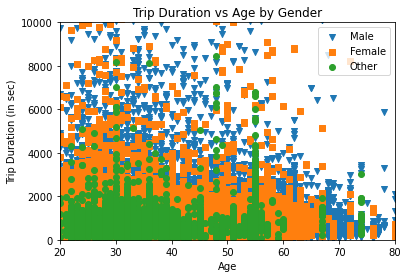

In [140]:
# scatterplot to compare trip duration vs age by gender type

gender_mark = [['Male', 'v'],['Female', 's'],['Other', 'o']]

for gender, marker in gender_mark:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([20, 80, 0, 10000 ])
plt.title('Trip Duration vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Trip Duration (in sec)')
plt.show()

This view is way too cluttered.  Need to graph separately

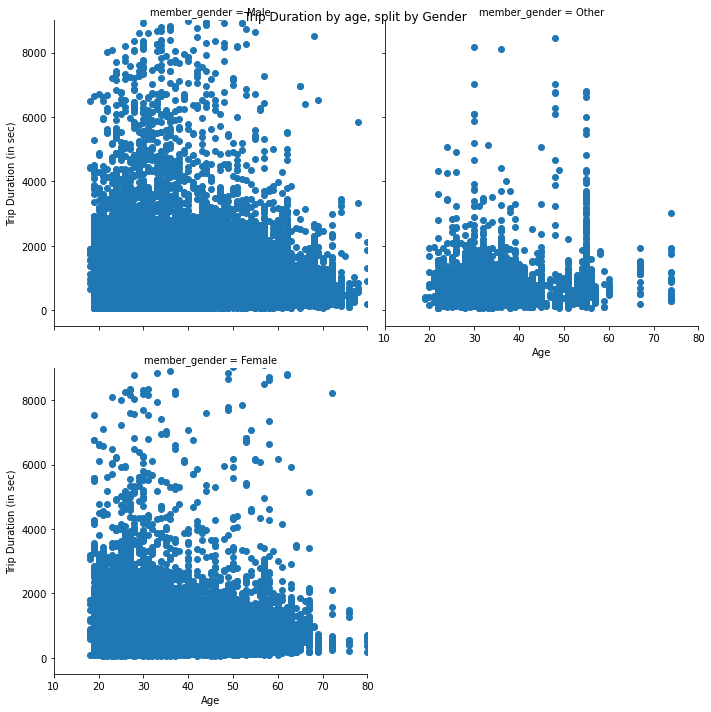

In [139]:
# individual scatterplots to compare trip duration vs age (each gender having its own scatterplot)

df['age'] = (2019 - df['member_birth_year'])

gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 1)
gender.fig.suptitle('Trip Duration by age, split by Gender')
gender.set_xlabels('Age')
gender.set_ylabels('Trip Duration (in sec)')

plt.show()

These scatter plots confirm the earlier finding that trip duration declines as age increases
* This decline is very evident with males & females but not as prominent with those who selected "other" as their gender
* The scatters for males & females look very similar

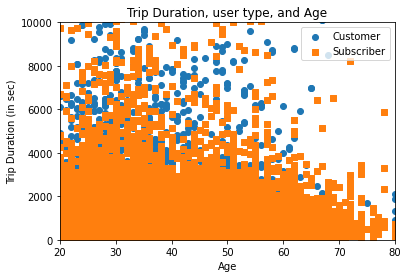

In [138]:
# scatterplot to compare trip duration vs age by customer type
usertype_mark = [['Customer', 'o'],['Subscriber', 's']]

for utype, marker in usertype_mark:
    df_utype = df[df['user_type'] == utype]
    plt.scatter((2019 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Customer','Subscriber'])
plt.axis([20, 80, 0, 10000 ])
plt.title('Trip Duration by age, split by customer type')
plt.xlabel('Age')
plt.ylabel('Trip Duration (in sec)')
plt.show()

This scatter also shows that trip duration declines as age increases
Again, this dual scatter is not the easiest to read (cannot confirm values of customer behind the subscribers)

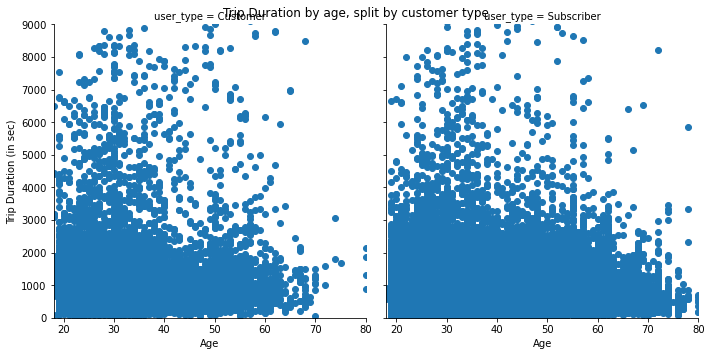

In [144]:
# individual scatterplots to compare trip duration vs age (each customer type having its own scatterplot)

user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [18, 80], ylim = [0, 9000])
user_type.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Trip Duration (in sec)')
user_type.fig.suptitle('Trip Duration by age, split by customer type')
plt.show()

Multiple findings here:
* there are far more subscribers over 60 compared to customers
* subscribers tend to have slightly longer durations

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The number of male users is much greater than any other gender
* However males also have the lowest trip duration

Age is the main determiner of how long trip duration will be
* The older the rider, the shorter the trip

The number of subscribers is much greater than customers
* However customers have longer trip durations

### Were there any interesting or surprising interactions between features?

* It was interesting to see that there are several subscribers over 70 years old, but very few customers at that age group
* Also interesting that those customers who specified their gender as "other" have trends for trip durations that do not mirror either males or females